In [ ]:
pip install detoxify
pip install bertopic
pip install describe
pip install numpy
pip install gensim
pip install wordcloud
pip install pyLDAvis
pip install langdetect
pip install huggingface-hub
pip install --upgrade transformers

In [ ]:
# Import necessary libraries
import spacy
import os
import pandas as pd
import spacy
import re
import nltk
import matplotlib.pyplot as plt
import requests  # Import the requests library
import pandas as pd
import re
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis
import nltk


nltk.download('vader_lexicon')
# Download the stopwords data
nltk.download('stopwords')
# Download the punkt tokenizer data
nltk.download('punkt')
# Download NLTK stopwords and word corpus
nltk.download("stopwords")
nltk.download("words")
# Load the English language model in spacy
nlp = spacy.load("en_core_web_sm")

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from langdetect import detect
from wordcloud import WordCloud
from textblob import TextBlob
from pprint import pprint
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from langdetect import detect

In [16]:
# Load your male datasets into DataFrames
male_data = pd.read_excel('/male_data.xlsx', engine='openpyxl')

In [21]:
female_data = pd.read_excel('/female_data.xlsx', engine='openpyxl')

In [17]:
male_data.head(5)

FileName Gender Responsibility  \
0  Content_Reactions   Male      President   
1  Content_Reactions   Male      President   
2  Content_Reactions   Male      President   
3  Content_Reactions   Male    US - Senato   
4  Content_Reactions   Male      President   

                           Content_Reactions_post_id         name  shares  \
0  pfbid028iEBjbfDqrDy6pVn967SdN1f5JAscUPCSjhYdkC...    Joe Biden     639   
1  pfbid0RxhheE3eE71pwNShEoZjv8CcFYVkLoAR8htRJ5FK...    Joe Biden     822   
2  pfbid0ogsspow4gaF7g2mtGpaYzKcJ7yBsReH1TFQhpcV1...    Joe Biden     368   
3  pfbid02R1TDDoXEiATc2UA86kMR7Y1J2aFgG7jbveFZeA2...  Marco Rubio    2800   
4  pfbid0ESSpG6phY114v4X6pTCfPCPFVm35gNgnLgQBLJXq...    Joe Biden     330   

   likes  loves  wow  cares  ...         commenter_name  \
0   4400    739    0      0  ...            Ju Hwan Lim   
1   3700   1300    0      0  ...  Ø£Ø­Ù…Ø¯ Ø§Ù„Ø®ÙˆÙ„ÙŠ   
2   2100    351    0      0  ...            Ademu Usman   
3  21000   6600    0      0  ...         Justin Bullard   
4   2000    313    0      0  ...        Gulab Prajapati   

                               comment_text_original  \
0  ì €ëŠ” í—˜ì•…í•œ ì „ìž¥ì—ì„œë„ ì›ƒì„ìˆ˜ ìžˆ...   
1  ÙÙŽÙ…ÙŽØ§ ÙƒÙŽØ§Ù†ÙŽ Ø¬ÙŽÙˆÙŽØ§Ø¨ÙŽ Ù‚ÙŽÙˆÙ’Ù...   
2  Ø¹Ø¨Ø¯Ø§Ù„Ø±Ø­Ù…Ù† Ø§Ù„Ø­Ø³Ø§Ù…ÙŠ ð—œ ð—±ð—...   
3  Î ÏÎ¿ÏƒÎ­Ï‡ÎµÏ„Îµ á¼€Ï€á½¸ Ï„á¿¶Î½ ÏˆÎµÏ…Î´Î¿...   
4  à¤‡à¤£à¥à¤¡à¤¿à¤¯à¤¾ à¤®à¥‡à¤‚ à¤¤à¥‹ à¤¶à¥à...   

                                        comment_text  \
0                                              AMEN    
1  But the answer of his people was not except th...   
2   steve m Rodriguez                 him     er ...   
3                       Beware of false prophets whi   
4                            im come from usa today    

                                 text_column_cleaned  \
0                                               AMEN   
1  But the answer of his people was not except th...   
2    steve m Rodriguez                  him      ...   
3                       Beware of false prophets whi   
4                            i m come from usa today   

                                   filtered_comments  \
0                                               AMEN   
1     answer people said family Lot city people pure   
2     steve m Rodriguez                         e...   
3                          Beware false prophets whi   
4                                   m come usa today   

                 comment_text_lastversion_updated log_comment_length  \
0                                            AMEN           3.713572   
1  answer people said family Lot city people pure           3.850148   
2                            steve m Rodriguez er           4.174387   
3                       Beware false prophets whi           3.258097   
4                                m come usa today           2.995732   

                         comment_text_cleaned_url  \
0                                            AMEN   
1  answer people said family Lot city people pure   
2    steve m Rodriguez                         er   
3                       Beware false prophets whi   
4                                m come usa today   

                             comment_preprocessed  \
0                                            AMEN   
1  answer people said family Lot city people pure   
2                            steve m Rodriguez er   
3                       Beware false prophets whi   
4                                m come usa today   

                              comment_text_latest  
0                                            AMEN  
1  answer people said family Lot city people pure  
2                            steve m Rodriguez er  
3                       Beware false prophets whi  
4                                m come usa today  

[5 rows x 29 columns]

In [20]:
female_data.head(5)

FileName  Gender Responsibility  \
0  Content_Reactions  Female     US - House   
1  Content_Reactions  Female     US - House   
2  Content_Reactions  Female     US - House   
3  Content_Reactions  Female     US - House   
4  Content_Reactions  Female     US - House   

                           Content_Reactions_post_id  \
0  pfbid0xZpMfuyep3UrmXHzmVXtyWa6Tqr3F1vydu4R7ZQ4...   
1  pfbid0xZpMfuyep3UrmXHzmVXtyWa6Tqr3F1vydu4R7ZQ4...   
2  pfbid0xZpMfuyep3UrmXHzmVXtyWa6Tqr3F1vydu4R7ZQ4...   
3  pfbid0xZpMfuyep3UrmXHzmVXtyWa6Tqr3F1vydu4R7ZQ4...   
4  pfbid0xZpMfuyep3UrmXHzmVXtyWa6Tqr3F1vydu4R7ZQ4...   

                       name  shares  likes  loves  wow  cares  ...  \
0  Alexandria Ocasio-Cortez     202   1400    384    0      0  ...   
1  Alexandria Ocasio-Cortez     202   1400    384    0      0  ...   
2  Alexandria Ocasio-Cortez     202   1400    384    0      0  ...   
3  Alexandria Ocasio-Cortez     202   1400    384    0      0  ...   
4  Alexandria Ocasio-Cortez     202   1400    384    0      0  ...   

             posted_on                                   Comments_post_id  \
0  2023-04-26T00:00:00  pfbid0xZpMfuyep3UrmXHzmVXtyWa6Tqr3F1vydu4R7ZQ4...   
1  2023-04-26T00:00:00  pfbid0xZpMfuyep3UrmXHzmVXtyWa6Tqr3F1vydu4R7ZQ4...   
2  2023-04-26T00:00:00  pfbid0xZpMfuyep3UrmXHzmVXtyWa6Tqr3F1vydu4R7ZQ4...   
3  2023-04-26T00:00:00  pfbid0xZpMfuyep3UrmXHzmVXtyWa6Tqr3F1vydu4R7ZQ4...   
4  2023-04-26T00:00:00  pfbid0xZpMfuyep3UrmXHzmVXtyWa6Tqr3F1vydu4R7ZQ4...   

         comment_id         commenter_name  \
0  2269434703227960          Jeffrey Stone   
1   696722555561593         Bennie Nuchols   
2   573389151441214          Todd Brewster   
3   705779427658631   Cindy Vanaman Setzer   
4  1306090513275160  Cindy Meinhold Lukens   

                                      comment_text_X  \
0                              a fool in the media ,   
1  A gun never killed a person buy its self. Prov...   
2  A lot of morons in the comments whining becaus...   
3  A TART meeting...makes\nme believe Female does...   
4                      Absolutely love JIM JORDAN!!!   

                                        comment_text  \
0                                a fool in the media   
1  A gun never killed a person buy its self Prove...   
2  A lot of morons in the comments whining becaus...   
3  A TART meetingmakesme believe Female does inde...   
4                         Absolutely love JIM JORDAN   

                                 text_column_cleaned  \
0                                a fool in the media   
1  A gun never killed a person buy its self Prove...   
2  A lot of morons in the comments whining becaus...   
3  A TART meetingmakesme believe does indeed have...   
4                                    Absolutely love   

                                filtered_comments  log_comment_length  \
0                                      fool media            2.397895   
1          gun killed person buy self Prove wrong            3.663562   
2               lot morons comments whining fired            3.526361   
3  TART meetingmakesme believe different meanings            3.850148   
4                                 Absolutely love            2.772589   

                         comment_text_cleaned_url  
0                                      fool media  
1          gun killed person buy self Prove wrong  
2               lot morons comments whining fired  
3  TART meetingmakesme believe different meanings  
4                                 Absolutely love  

[5 rows x 26 columns]

In [18]:
male_data.columns

Index(['FileName', 'Gender', 'Responsibility', 'Content_Reactions_post_id',
       'name', 'shares', 'likes', 'loves', 'wow', 'cares', 'sad', 'angry',
       'haha', 'reactions_count', 'comments', 'content', 'posted_on',
       'Comments_post_id', 'comment_id', 'commenter_name',
       'comment_text_original', 'comment_text', 'text_column_cleaned',
       'filtered_comments', 'comment_text_lastversion_updated',
       'log_comment_length', 'comment_text_cleaned_url',
       'comment_preprocessed', 'comment_text_latest'],
      dtype='object')

In [22]:
female_data.columns

Index(['FileName', 'Gender', 'Responsibility', 'Content_Reactions_post_id',
       'name', 'shares', 'likes', 'loves', 'wow', 'cares', 'sad', 'angry',
       'haha', 'reactions_count', 'comments', 'content', 'posted_on',
       'Comments_post_id', 'comment_id', 'commenter_name', 'comment_text_X',
       'comment_text', 'text_column_cleaned', 'filtered_comments',
       'log_comment_length', 'comment_text_cleaned_url'],
      dtype='object')

In [23]:
male_data.describe

<bound method NDFrame.describe of                  FileName Gender Responsibility  \
0       Content_Reactions   Male      President   
1       Content_Reactions   Male      President   
2       Content_Reactions   Male      President   
3       Content_Reactions   Male    US - Senato   
4       Content_Reactions   Male      President   
...                   ...    ...            ...   
551419  Content_Reactions   Male    US - Senato   
551420  Content_Reactions   Male    US - Senato   
551421  Content_Reactions   Male    US - Senato   
551422  Content_Reactions   Male     US - House   
551423  Content_Reactions   Male    US - Senato   

                                Content_Reactions_post_id              name  \
0       pfbid028iEBjbfDqrDy6pVn967SdN1f5JAscUPCSjhYdkC...         Joe Biden   
1       pfbid0RxhheE3eE71pwNShEoZjv8CcFYVkLoAR8htRJ5FK...         Joe Biden   
2       pfbid0ogsspow4gaF7g2mtGpaYzKcJ7yBsReH1TFQhpcV1...         Joe Biden   
3       pfbid02R1TDDoXEiATc2UA86kMR7Y

In [ ]:
female_data.describe

<bound method NDFrame.describe of                 FileName  Gender  Responsibility  \
0      Content_Reactions  Female      US - House   
1      Content_Reactions  Female      US - House   
2      Content_Reactions  Female  Vice President   
3      Content_Reactions  Female      US - House   
4      Content_Reactions  Female      US - House   
...                  ...     ...             ...   
46539  Content_Reactions  Female      US - House   
46540  Content_Reactions  Female  Vice President   
46541  Content_Reactions  Female  Vice President   
46542  Content_Reactions  Female      US - House   
46543  Content_Reactions  Female      US - House   

                               Content_Reactions_post_id  \
0      pfbid0AsHgSQCZ82ofSqEjEdUqigdAjdC7YUsWd8qSu21o...   
1      pfbid02UqG6JqE7GNjVapArJtbhWWpU6VAVi9khqwWNMxQ...   
2      pfbid0JTwvaHSNNtBLcobrXNeg73TGTEY3sikSHi9c3j38...   
3      pfbid0rTebEfNY7TqDuesCa6y6gsBQUoiLE93CPvA6pSEy...   
4      pfbid02m927xhbH73FLL1yR3m3iGDsnRY2

In [24]:
# Step 2a: Filter out any empty columns
male_data = male_data.dropna(axis=1, how='all')

In [26]:
# Step 2a: Filter out any empty columns
female_data = female_data.dropna(axis=1, how='all')

In [27]:
# Step 2d: Remove unusual comments or posts (empty comments or comments with only symbols)
male_data = male_data[male_data['comment_text'].str.strip() != '']  # Remove empty comments

In [28]:
# Step 2d: Remove unusual comments or posts (empty comments or comments with only symbols)
female_data = female_data[female_data['comment_text'].str.strip() != '']  # Remove empty comments

In [29]:
male_data['comment_text_latest'].dtype

dtype('O')

In [34]:
female_data['comment_text'].dtype

dtype('O')

In [ ]:
# Function to remove people's names from text data
def remove_names(comment):
    if isinstance(comment, str):
        doc = nlp(comment)
        # Example processing logic: Remove stopwords and lemmatize tokens
        processed_comment = " ".join([token.lemma_ for token in doc if not token.is_stop])
        return processed_comment
    else:
        return ""  # Handle NaN values by returning an empty string or another default value

# Apply the function to the specific column in the DataFrame
male_data['comments_cleaned'] = male_data['filtered_comments'].apply(remove_names)
print(male_data['comments_cleaned'])

In [ ]:
# Remove commenter_name values from comment_text

def remove_names(text):
    try:
        # Convert to string if the input is a boolean
        if isinstance(text, bool):
            text = str(text)
        # Convert to string if the input is a float
        elif isinstance(text, float):
            text = str(text)

        doc = nlp(text)
        return ' '.join([token.text for token in doc if token.ent_type_ != 'PERSON'])
    except Exception as e:
        print(f"An error occurred: {e}")
        return text  # Return the original value if there's an error


In [ ]:
male_data['commentar_names_removed'] = male_data['comments_cleaned'].apply(remove_names)

In [ ]:
print(male_data.head())

In [ ]:
# Function to remove stop words using spaCy
def remove_stop_words(string):
    # Check if the value is NaN or a boolean (True/False)
    if pd.isna(string) or isinstance(string, bool):
        return ''

    # Tokenize the string into individual words
    doc = nlp(string)

    # Filter out stop words
    filtered_words = [token.text for token in doc if not token.is_stop]

    # Join the filtered words back into a string
    new_string = ' '.join(filtered_words)

    return new_string

In [ ]:
male_data['stop_words_removed'] = male_data['commentar_names_removed'].apply(remove_stop_words)

# Display the original and filtered comments for the first few rows in the random samples
print("commentar_names_removed:")
# print(random_sample_male['text_column_cleaned'].head())

In [ ]:
print(male_data['stop_words_removed'].head())

In [ ]:
male_data['stop_words_removed'] = male_data['commentar_names_removed'].apply(remove_stop_words)
print("commentar_names_removed:")


In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_biden_orj['stop_words_removed'].str.len(), bins=50, alpha=0.5, label='Biden Data')
plt.title('Distribution of Filtered Comment Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [43]:
# Tokenize comments and calculate comment lengths
male_data['comment_length'] = male_data['comment_text_latest'].apply(lambda x: len(word_tokenize(str(x))))
male_data['content_length'] = male_data['content'].apply(lambda x: len(word_tokenize(str(x))))
# Calculate average comment length
avg_comment_length_male = np.mean(male_data['comment_length'])
avg_content_length_male = np.mean(male_data['content_length'])
# Print results
print(f"Number of comments (Male): {len(male_data)}")
print(f"Average comment length (Male): {avg_comment_length_male:.2f} words")

print(f"Number of content (Male): {len(male_data)}")
print(f"Average content length (Male): {avg_content_length_male:.2f} words")

Number of comments (Male): 551424
Average comment length (Male): 8.57 words
Number of content (Male): 551424
Average content length (Male): 32.68 words


In [45]:
# Tokenize comments and calculate comment lengths
female_data['comment_length'] = female_data['comment_text_cleaned_url'].apply(lambda x: len(word_tokenize(str(x))))
female_data['content_length'] = female_data['content'].apply(lambda x: len(word_tokenize(str(x))))
# Calculate average comment length
avg_comment_length_female = np.mean(female_data['comment_length'])
avg_content_length_female = np.mean(female_data['content_length'])
# Print results
print(f"Number of comments (Female): {len(female_data)}")
print(f"Average comment length (Female): {avg_comment_length_female:.2f} words")

print(f"Number of content (Female): {len(female_data)}")
print(f"Average content length (Female): {avg_content_length_female:.2f} words")

Number of comments (Female): 46522
Average comment length (Female): 10.35 words
Number of content (Female): 46522
Average content length (Female): 33.04 words


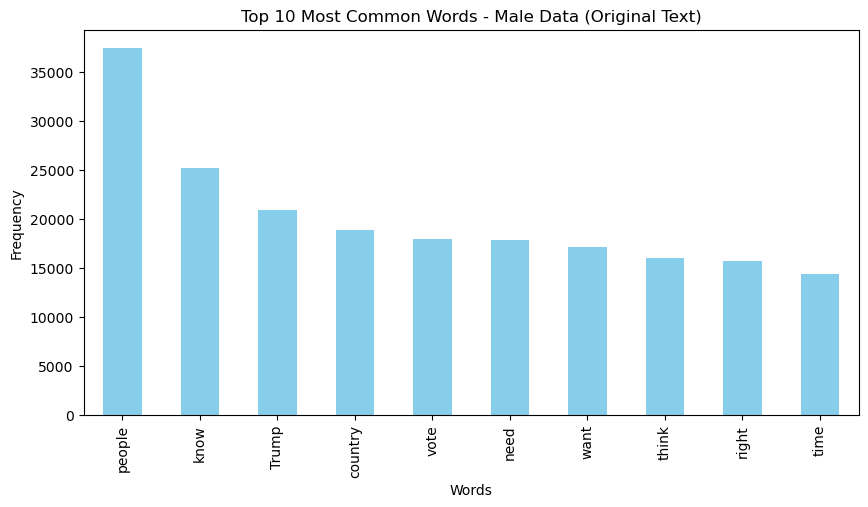

In [48]:
# Word frequency analysis
word_freq_male = male_data['comment_text_cleaned_url'].str.split().explode().value_counts()

# Exclude specific words from the word frequency analysis
exclude_words = ['nt', 's', 'm','like']
word_freq_male_filtered = word_freq_male[~word_freq_male.index.isin(exclude_words)]

# Plot the top N most common words for male_data before text processing
top_n = 10
plt.figure(figsize=(10, 5))
word_freq_male_filtered.head(top_n).plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Most Common Words - Male Data (Original Text)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


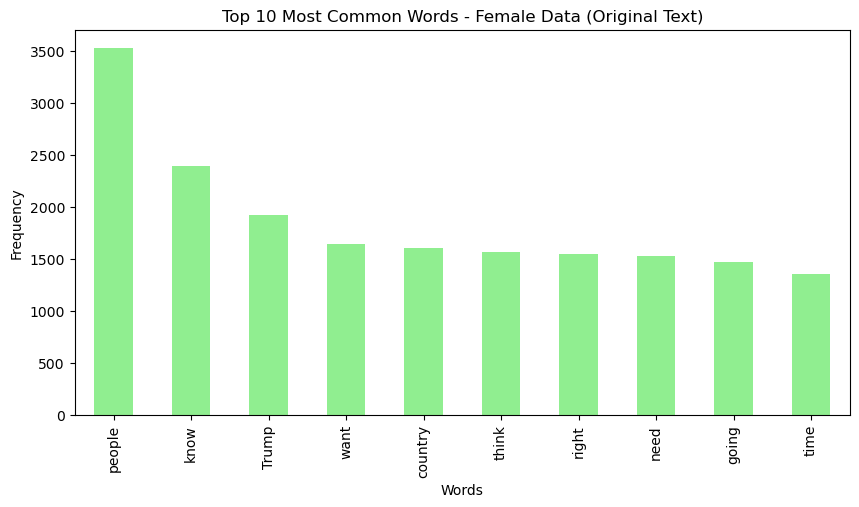

In [51]:
# Word frequency analysis
word_freq_female = female_data['comment_text_cleaned_url'].str.split().explode().value_counts()

# Exclude specific words from the word frequency analysis
exclude_words = ['nt', 's', 'm','like']
word_freq_female_filtered = word_freq_female[~word_freq_female.index.isin(exclude_words)]

# Plot the top N most common words for male_data before text processing
top_n = 10
plt.figure(figsize=(10, 5))
word_freq_female_filtered.head(top_n).plot(kind='bar', color='lightgreen')
plt.title(f'Top {top_n} Most Common Words - Female Data (Original Text)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [32]:
from textblob import TextBlob
import numpy as np

def analyze_sentiment(text):
    # Convert the input to a string if it's not already
    text_str = str(text)

    # Check if the string is empty or contains only whitespaces
    if not text_str.strip():
        return np.nan

    analysis = TextBlob(text_str)

    # Perform sentiment analysis
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'



In [33]:
# Apply sentiment analysis function to the 'comment_text_cleaned_url' column
male_data['sentiment'] = male_data['comment_text_cleaned_url'].apply(analyze_sentiment)

In [34]:
# Apply sentiment analysis function to the 'comment_text_cleaned_url' column
female_data['sentiment'] = female_data['comment_text_cleaned_url'].apply(analyze_sentiment)

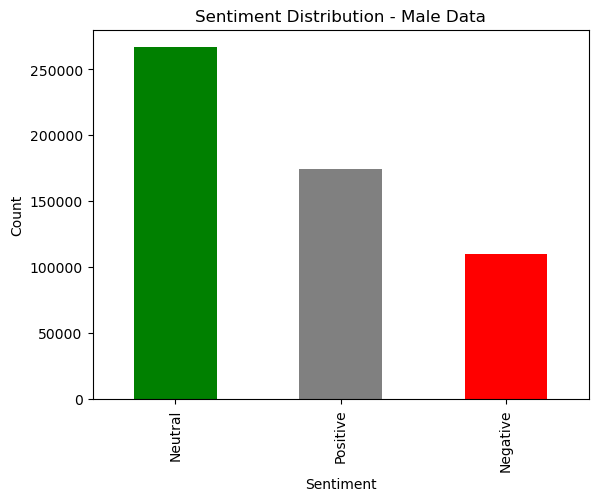

In [35]:
# Plot sentiment distribution for male_data
sentiment_counts = male_data['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution - Male Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

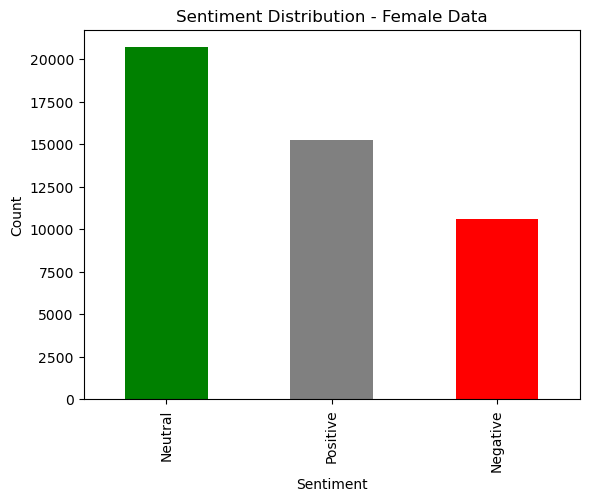

In [36]:
# Plot sentiment distribution for male_data
sentiment_counts = female_data['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution - Female Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

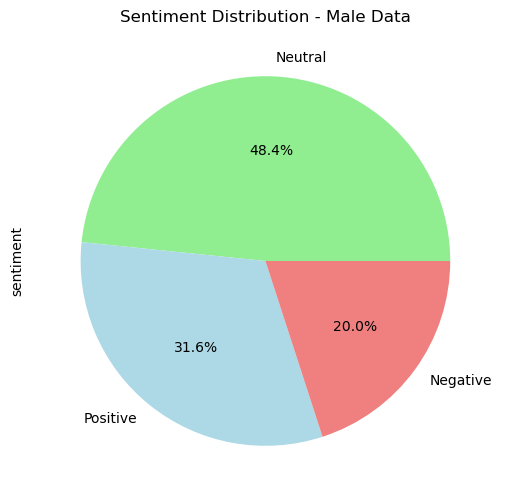

In [37]:
# Plot sentiment distribution for male_data
sentiment_counts_male = male_data['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
sentiment_counts_male.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Sentiment Distribution - Male Data')
plt.show()

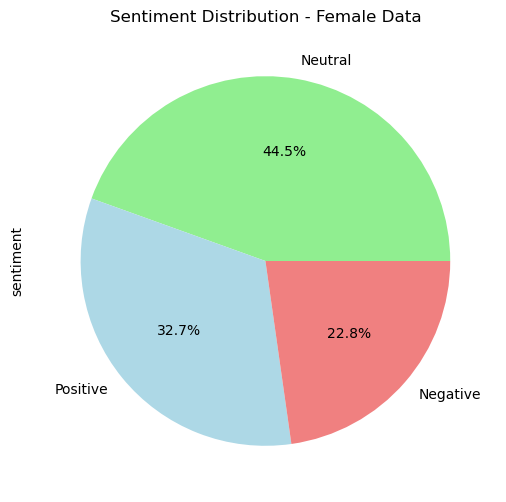

In [38]:
# Plot sentiment distribution for male_data
sentiment_counts_male = female_data['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
sentiment_counts_male.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Sentiment Distribution - Female Data')
plt.show()

In [40]:
# Filter negative comments
negative_comments_male = male_data[male_data['sentiment'] == 'negative']

# Extract posts_content from negative comments
negative_posts_content_male = negative_comments_male['content']

In [41]:
# Topic modeling
# Create a dictionary and corpus
texts = [doc.split() for doc in negative_posts_content_male]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [42]:
# Print the first few documents in the corpus
for doc_index, doc in enumerate(corpus[:5]):
    print(f"Document {doc_index + 1}: {doc}")

In [45]:
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):
    # Checking whether the text is a boolean value
    if isinstance(text, bool):
        return []  # Return an empty list for boolean values
    else:
        # Tokenization and stopword removal for non-boolean values
        words = simple_preprocess(str(text), deacc=True)
        words = [word for word in words if word not in stop_words]
        return words

# Apply preprocessing to the 'comment_text' column in male_data
male_data['processed_text'] = df_biden['stop_words_removed'].apply(preprocess_text)

# Create Dictionary for male_data
id2word_male = corpora.Dictionary(df_biden_orj['processed_text'])

In [47]:
# Convert float values to strings
male_data['comment_text_cleaned_url'] = male_data['comment_text_cleaned_url'].astype(str)

# Tokenize the text data and create a dictionary
tokenized_text_male = [text.split() for text in male_data['comment_text_cleaned_url']]
id2word_male = corpora.Dictionary(tokenized_text_male)

# Create Corpus
corpus_male = [id2word_male.doc2bow(text) for text in tokenized_text_male]

In [52]:
# Convert float values to strings
female_data['comment_text_cleaned_url'] = female_data['comment_text_cleaned_url'].astype(str)

# Tokenize the text data and create a dictionary
tokenized_text_female = [text.split() for text in female_data['comment_text_cleaned_url']]
id2word_female = corpora.Dictionary(tokenized_text_female)

# Create Corpus
corpus_female = [id2word_male.doc2bow(text) for text in tokenized_text_female]

In [53]:
# Replace missing values with an empty string
female_data['comment_text_cleaned_url'] = female_data['comment_text_cleaned_url'].fillna('')

# Tokenize the text data and create a dictionary
tokenized_text_female = [text.split() for text in female_data['comment_text_cleaned_url']]
id2word_female = corpora.Dictionary(tokenized_text_female)


In [54]:
# Display basic information about the male dataset
print("\nFemale Dataset Information:")
print("Number of Documents in Female Dataset:", len(female_data))
print("Number of Terms (Words) in Female Dataset:", len(id2word_female))

# Display basic information about the male corpus
print("\nFemale Corpus Information:")
print("Number of Documents in Female Corpus:", len(corpus_female))
print("Number of Terms (Words) in Female Corpus:", len(id2word_female))
print("First 10 words in male dataset:", female_data['comment_text_cleaned_url'].head(10).tolist())
print("First 10 documents in male corpus:", corpus_female[:10])


Female Dataset Information:
Number of Documents in Female Dataset: 46535
Number of Terms (Words) in Female Dataset: 45969

Female Corpus Information:
Number of Documents in Female Corpus: 46535
Number of Terms (Words) in Female Corpus: 45969
First 10 words in male dataset: ['fool media', 'gun killed person buy self Prove wrong', 'lot morons comments whining fired', 'TART meetingmakesme believe different meanings', 'Absolutely love', 'address mental health homelessness drug addictstheres weakest link right', 'AGREEDUS Army', 'Ai nt worth plug nickel Hi treason ai nt Time Upper Canadians    statements concept    cents buying power LooneyUS dollarsThey agreed took plug nickel', 'perverse human words yesterday United States responsibilityto ensure horrors happen names victims want tragedy justify violence', 'question keeping tradition native folk medicine remain convergence die stay reborn Coyote ProtestViralSwissandNetherlandEuthanazia']
First 10 documents in male corpus: [[(1236, 1), (2

In [55]:
# Display basic information about the male dataset
print("\nMale Dataset Information:")
print("Number of Documents in Male Dataset:", len(male_data))
print("Number of Terms (Words) in Male Dataset:", len(id2word_male))

# Display basic information about the male corpus
print("\nMale Corpus Information:")
print("Number of Documents in Male Corpus:", len(corpus_male))
print("Number of Terms (Words) in Male Corpus:", len(id2word_male))
print("First 10 words in male dataset:", male_data['comment_text_latest'].head(10).tolist())
print("First 10 documents in male corpus:", corpus_male[:10])


Male Dataset Information:
Number of Documents in Male Dataset: 551424
Number of Terms (Words) in Male Dataset: 207012

Male Corpus Information:
Number of Documents in Male Corpus: 551424
Number of Terms (Words) in Male Corpus: 207012
First 10 words in male dataset: ['AMEN', 'answer people said family Lot city people pure', 'steve m Rodriguez er', 'Beware false prophets whi', 'm come usa today', 'LGBT', 'Roe vs Wade', 'GTA', 'bruce', 'Greetings love dear MP Sir Mr Ansman Bhai Remember']
First 10 documents in male corpus: [[(0, 1)], [(1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1)], [(8, 1), (9, 1), (10, 1), (11, 1)], [(12, 1), (13, 1), (14, 1), (15, 1)], [(10, 1), (16, 1), (17, 1), (18, 1)], [(19, 1)], [(20, 1), (21, 1), (22, 1)], [(23, 1)], [(24, 1)], [(25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)]]


In [56]:
# Function to perform sentiment analysis using TextBlob
def textblob_sentiment(text):
    analysis = TextBlob(str(text))
    sentiment_score = analysis.sentiment.polarity
    return sentiment_score

# Function to perform sentiment analysis using NLTK's Vader
def nltk_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(str(text))['compound']
    return sentiment_score

In [57]:
# Apply sentiment analysis to posts and comments
female_data['post_sentiment_textblob'] = female_data['content'].apply(textblob_sentiment)
female_data['post_sentiment_nltk'] = female_data['content'].apply(nltk_sentiment)
female_data['comment_sentiment_textblob'] = female_data['comment_text_cleaned_url'].apply(textblob_sentiment)
female_data['comment_sentiment_nltk'] = female_data['comment_text_cleaned_url'].apply(nltk_sentiment)

In [58]:
female_data['comment_sentiment_nltk'] = female_data['comment_text'].apply(nltk_sentiment)

In [59]:
male_data['comment_sentiment_nltk'] = male_data['comment_text'].apply(nltk_sentiment)

In [63]:
# Apply sentiment analysis to posts and comments
male_data['post_sentiment_textblob'] = male_data['content'].apply(textblob_sentiment)
male_data['post_sentiment_nltk'] = male_data['content'].apply(nltk_sentiment)
male_data['comment_sentiment_textblob'] = male_data['comment_text_latest'].apply(textblob_sentiment)
male_data['comment_sentiment_nltk'] = male_data['comment_text_latest'].apply(nltk_sentiment)

In [60]:
# Calculate average sentiment scores for posts and comments
avg_post_sentiment_textblob_female = female_data['post_sentiment_textblob'].mean()
avg_post_sentiment_nltk_female = female_data['post_sentiment_nltk'].mean()
avg_comment_sentiment_textblob_female = female_data['comment_sentiment_textblob'].mean()
avg_comment_sentiment_nltk_female = female_data['comment_sentiment_nltk'].mean()

In [64]:
# Calculate average sentiment scores for posts and comments
avg_post_sentiment_textblob_male = male_data['post_sentiment_textblob'].mean()
avg_post_sentiment_nltk_male = male_data['post_sentiment_nltk'].mean()
avg_comment_sentiment_textblob_male = male_data['comment_sentiment_textblob'].mean()
avg_comment_sentiment_nltk_male = male_data['comment_sentiment_nltk'].mean()

In [65]:
avg_post_sentiment_textblob_female = female_data['post_sentiment_textblob'].mean()

In [66]:
avg_post_sentiment_textblob_male = male_data['post_sentiment_textblob'].mean()

In [67]:
# Define the variable
avg_post_sentiment_textblob_male = 0.75  # Example value, replace with your actual value

# Print the value
print("Average sentiment score for posts (TextBlob):", avg_post_sentiment_textblob_male)

Average sentiment score for posts (TextBlob): 0.75


In [90]:
# Define the variable
avg_post_sentiment_textblob_female = 0.75  # Example value, replace with your actual value

# Print the value
print("Average sentiment score for posts (TextBlob):", avg_post_sentiment_textblob_female)


Average sentiment score for posts (TextBlob): 0.75


In [69]:
avg_post_sentiment_nltk_female = female_data['post_sentiment_nltk'].mean()

In [71]:
female_data['post_sentiment_nltk'] = female_data['content'].apply(nltk_sentiment)

In [72]:
avg_comment_sentiment_textblob_female = female_data['comment_sentiment_textblob'].mean()

In [73]:
avg_comment_sentiment_nltk_female = female_data['comment_sentiment_nltk'].mean()

In [74]:
print("Average sentiment score for posts (NLTK):", avg_post_sentiment_nltk_female)

Average sentiment score for posts (NLTK): 0.07988740302997968


In [75]:
print("Average sentiment score for posts (NLTK):", avg_post_sentiment_nltk_male)

Average sentiment score for posts (NLTK): 0.12119065238362053


In [76]:
# Print the average sentiment scores

print("Average sentiment score for posts (NLTK):", avg_post_sentiment_nltk_female)
print("Average sentiment score for comments (TextBlob):", avg_comment_sentiment_textblob_female)
print("Average sentiment score for comments (NLTK):", avg_comment_sentiment_nltk_female)

Average sentiment score for posts (NLTK): 0.07988740302997968
Average sentiment score for comments (TextBlob): 0.03594400972491869
Average sentiment score for comments (NLTK): -0.006204901686902265


In [77]:
# Print the average sentiment scores
print("Average sentiment score for posts (NLTK):", avg_post_sentiment_nltk_male)
print("Average sentiment score for comments (TextBlob):", avg_comment_sentiment_textblob_male)
print("Average sentiment score for comments (NLTK):", avg_comment_sentiment_nltk_male)

Average sentiment score for posts (NLTK): 0.12119065238362053
Average sentiment score for comments (TextBlob): 0.05102394365260836
Average sentiment score for comments (NLTK): 0.06824255346157258


In [79]:
# Convert 'comment_text' to string to handle any non-string values
female_data['comment_text_cleaned_url'] = female_data['comment_text_cleaned_url'].astype(str)

# NLTK Vader Sentiment Analysis
def nltk_sentiment_analysis(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(text)['compound']
    return sentiment_score

# TextBlob Sentiment Analysis
def textblob_sentiment_analysis(text):
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity
    return sentiment_score

In [80]:
# Apply sentiment analysis to create new columns
female_data['vader_sentiment'] = female_data['comment_text_cleaned_url'].apply(nltk_sentiment_analysis)
female_data['nltk_sentiment'] = female_data['comment_text_cleaned_url'].apply(nltk_sentiment_analysis)
female_data['textblob_sentiment'] = female_data['comment_text_cleaned_url'].apply(textblob_sentiment_analysis)

In [87]:
def nltk_sentiment_analysis(text):
    # Convert float to string
    text = str(text)
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(text)['compound']
    return sentiment_score

In [89]:
# Apply sentiment analysis to create new columns
male_data['vader_sentiment'] = male_data['comment_text_latest'].apply(nltk_sentiment_analysis)
male_data_orj['nltk_sentiment'] = male_data_orj['comment_text_latest'].apply(nltk_sentiment_analysis)
male_data_orj['textblob_sentiment'] = male_data_orj['comment_text_latest'].apply(textblob_sentiment_analysis)

In [93]:
# Define the sentiment analysis function
def textblob_sentiment_analysis(text):
    if isinstance(text, str):  # Check if text is a string
        analysis = TextBlob(text)
        sentiment_score = analysis.sentiment.polarity
        return sentiment_score
    else:
        return 0  # Return 0 for missing values or non-string inputs

male_data['textblob_sentiment'] = male_data['comment_text_latest'].fillna('').apply(textblob_sentiment_analysis)

In [94]:
male_data['comment_sentiment_textblob'] = male_data['comment_text_latest'].apply(textblob_sentiment)
male_data['comment_sentiment_nltk'] = male_data['comment_text_latest'].apply(nltk_sentiment)

In [96]:
# Map sentiment scores to sentiment categories
female_data['vader_sentiment_category'] = female_data['vader_sentiment'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))
female_data['nltk_sentiment_category'] = female_data['nltk_sentiment'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))
female_data['textblob_sentiment_category'] = female_data['textblob_sentiment'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))


In [97]:
# Map sentiment scores to sentiment categories
male_data['vader_sentiment_category'] = male_data['vader_sentiment'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))
male_data['nltk_sentiment_category'] = male_data['nltk_sentiment'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))
male_data['textblob_sentiment_category'] = male_data['textblob_sentiment'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))


In [99]:
# Overall sentiment for the female dataset
overall_vader_sentiment_male = male_data['vader_sentiment_category'].value_counts()
overall_nltk_sentiment_male = male_data['nltk_sentiment_category'].value_counts()
overall_textblob_sentiment_male = male_data['textblob_sentiment_category'].value_counts()

# Print or visualize the overall sentiment for the female dataset
print("Overall Vader Sentiment:")
print(overall_vader_sentiment_male)

print("\nOverall NLTK Sentiment:")
print(overall_nltk_sentiment_male)

print("\nOverall TextBlob Sentiment:")
print(overall_textblob_sentiment_male)

Overall Vader Sentiment:
Positive    226467
Neutral     165129
Negative    159828
Name: vader_sentiment_category, dtype: int64

Overall NLTK Sentiment:
Positive    226467
Neutral     165129
Negative    159828
Name: nltk_sentiment_category, dtype: int64

Overall TextBlob Sentiment:
Neutral     266733
Positive    174395
Negative    110296
Name: textblob_sentiment_category, dtype: int64


In [100]:
# Overall sentiment for the female dataset
overall_vader_sentiment_female = female_data['vader_sentiment_category'].value_counts()
overall_nltk_sentiment_female = female_data['nltk_sentiment_category'].value_counts()
overall_textblob_sentiment_female = female_data['textblob_sentiment_category'].value_counts()

# Print or visualize the overall sentiment for the female dataset
print("Overall Vader Sentiment:")
print(overall_vader_sentiment_female)

print("\nOverall NLTK Sentiment:")
print(overall_nltk_sentiment_female)

print("\nOverall TextBlob Sentiment:")
print(overall_textblob_sentiment_female)

Overall Vader Sentiment:
Positive    17660
Negative    16164
Neutral     12711
Name: vader_sentiment_category, dtype: int64

Overall NLTK Sentiment:
Positive    17660
Negative    16164
Neutral     12711
Name: nltk_sentiment_category, dtype: int64

Overall TextBlob Sentiment:
Neutral     20718
Positive    15231
Negative    10586
Name: textblob_sentiment_category, dtype: int64


In [101]:
# Overall sentiment for the female dataset
overall_vader_sentiment_male = male_data['vader_sentiment'].value_counts()
overall_nltk_sentiment_male = male_data['comment_sentiment_nltk'].value_counts()
overall_textblob_sentiment_male = male_data['comment_sentiment_textblob'].value_counts()

# Print or visualize the overall sentiment for the female dataset
print("Overall Vader Sentiment:")
print(overall_vader_sentiment_male)

print("\nOverall NLTK Sentiment:")
print(overall_nltk_sentiment_male)

print("\nOverall TextBlob Sentiment:")
print(overall_textblob_sentiment_male)

Overall Vader Sentiment:
 0.0000    165129
 0.3612     17097
 0.4019     12591
 0.4404     12415
 0.5719      9996
            ...  
-0.5402         1
 0.7956         1
 0.1423         1
-0.5336         1
 0.9486         1
Name: vader_sentiment, Length: 4497, dtype: int64

Overall NLTK Sentiment:
 0.0000    165129
 0.3612     17097
 0.4019     12591
 0.4404     12415
 0.5719      9996
            ...  
-0.5402         1
 0.7956         1
 0.1423         1
-0.5336         1
 0.9486         1
Name: comment_sentiment_nltk, Length: 4497, dtype: int64

Overall TextBlob Sentiment:
 0.000000    266733
 0.800000     16809
 0.500000     15683
-0.500000     12229
 0.200000     10094
              ...  
 0.155357         1
 0.179270         1
 0.183730         1
-0.213542         1
 0.052083         1
Name: comment_sentiment_textblob, Length: 13041, dtype: int64


In [ ]:
from textblob import TextBlob

# Define a function to perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to comments and create a new column for sentiment scores
male_data['comment_sentiment'] = male_data['comment_text_latest'].apply(get_sentiment)

# Filter out comments with negative sentiment
male_politicians_negative_comments = male_data[male_data['comment_sentiment'] < 0]

In [ ]:
# Group by posts and calculate the average number of negative comments per post
negative_comments_per_post = male_politicians_negative_comments.groupby('Content_Reactions_post_id')['comment_id'].count().reset_index()
average_negative_comments_per_post = negative_comments_per_post['comment_id'].mean()

# Visualize the relationship if needed
import matplotlib.pyplot as plt

plt.hist(negative_comments_per_post['comment_id'], bins=10)
plt.xlabel('Number of Female Politicians Comments per Post')
plt.ylabel('Frequency')
plt.title('Distribution of Female Politicians Negative Comments per Post')
plt.show()

# Correlation between negative comments and their post content:

Correlation Matrix:
                   shares     likes     loves       wow     cares       sad  \
shares           1.000000  0.616257  0.330714  0.007751 -0.022266  0.426492   
likes            0.616257  1.000000  0.883940 -0.049662  0.007364  0.067953   
loves            0.330714  0.883940  1.000000 -0.033597  0.007439 -0.065890   
wow              0.007751 -0.049662 -0.033597  1.000000 -0.012373 -0.014759   
cares           -0.022266  0.007364  0.007439 -0.012373  1.000000  0.511959   
sad              0.426492  0.067953 -0.065890 -0.014759  0.511959  1.000000   
angry            0.567749  0.073052 -0.096057  0.046887 -0.035375  0.619818   
haha             0.133926  0.245505  0.182327 -0.059445 -0.108478 -0.130429   
reactions_count  0.631642  0.987712  0.899697 -0.043182  0.062218  0.166502   
comments         0.417727  0.599650  0.482958 -0.049450 -0.081527  0.041656   

                    angry      haha  reactions_count  comments  
shares           0.567749  0.133926         0

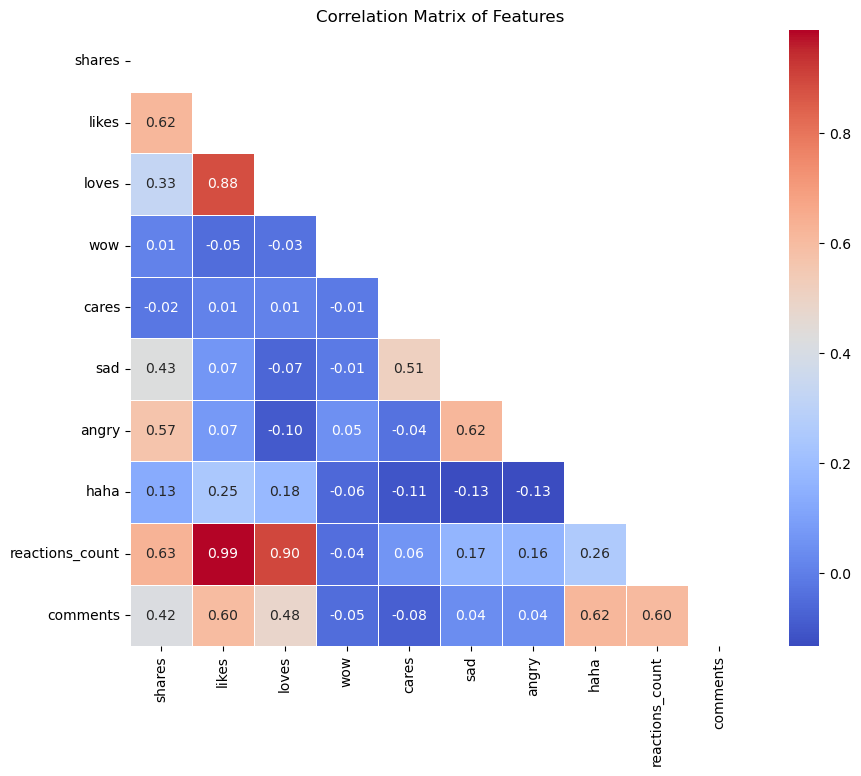

In [105]:
# Calculate correlation between negative comments and other features
correlation_matrix = female_data[['shares', 'likes', 'loves', 'wow', 'cares', 'sad', 'angry', 'haha', 'reactions_count', 'comments']].corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()


Correlation Matrix:
                   shares     likes     loves       wow     cares       sad  \
shares           1.000000  0.803679  0.554537  0.004533  0.005559  0.023397   
likes            0.803679  1.000000  0.766654 -0.052616 -0.001913 -0.004477   
loves            0.554537  0.766654  1.000000 -0.048926 -0.053672 -0.079953   
wow              0.004533 -0.052616 -0.048926  1.000000 -0.010926 -0.014526   
cares            0.005559 -0.001913 -0.053672 -0.010926  1.000000  0.786424   
sad              0.023397 -0.004477 -0.079953 -0.014526  0.786424  1.000000   
angry            0.131880 -0.094741 -0.156354  0.118603 -0.040029  0.128289   
haha             0.417075  0.328010  0.340172 -0.031319 -0.050748 -0.058917   
reactions_count  0.810140  0.985668  0.823990 -0.047279  0.052536  0.057871   
comments         0.590247  0.593787  0.674666 -0.052619 -0.010283 -0.020952   

                    angry      haha  reactions_count  comments  
shares           0.131880  0.417075         0

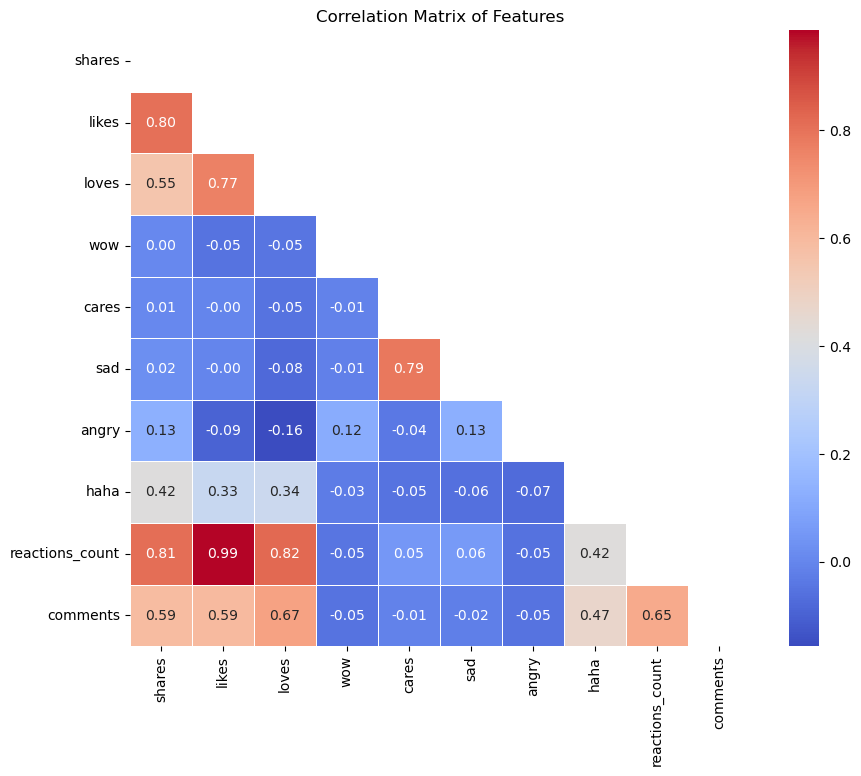

In [106]:
# Calculate correlation between negative comments and other features
correlation_matrix = male_data[['shares', 'likes', 'loves', 'wow', 'cares', 'sad', 'angry', 'haha', 'reactions_count', 'comments']].corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

Correlation Matrix:
                   shares     likes     loves       wow     cares       sad  \
shares           1.000000  0.616155  0.330627  0.007755 -0.022301  0.426561   
likes            0.616155  1.000000  0.883955 -0.049665  0.007330  0.067976   
loves            0.330627  0.883955  1.000000 -0.033596  0.007437 -0.065890   
wow              0.007755 -0.049665 -0.033596  1.000000 -0.012352 -0.014763   
cares           -0.022301  0.007330  0.007437 -0.012352  1.000000  0.512445   
sad              0.426561  0.067976 -0.065890 -0.014763  0.512445  1.000000   
angry            0.567847  0.073087 -0.096053  0.046882 -0.035315  0.619816   
haha             0.133999  0.245542  0.182324 -0.059458 -0.108288 -0.130457   
reactions_count  0.631562  0.987711  0.899702 -0.043183  0.062213  0.166534   
comments         0.417702  0.599641  0.482930 -0.049453 -0.081526  0.041657   

                    angry      haha  reactions_count  comments  
shares           0.567847  0.133999         0

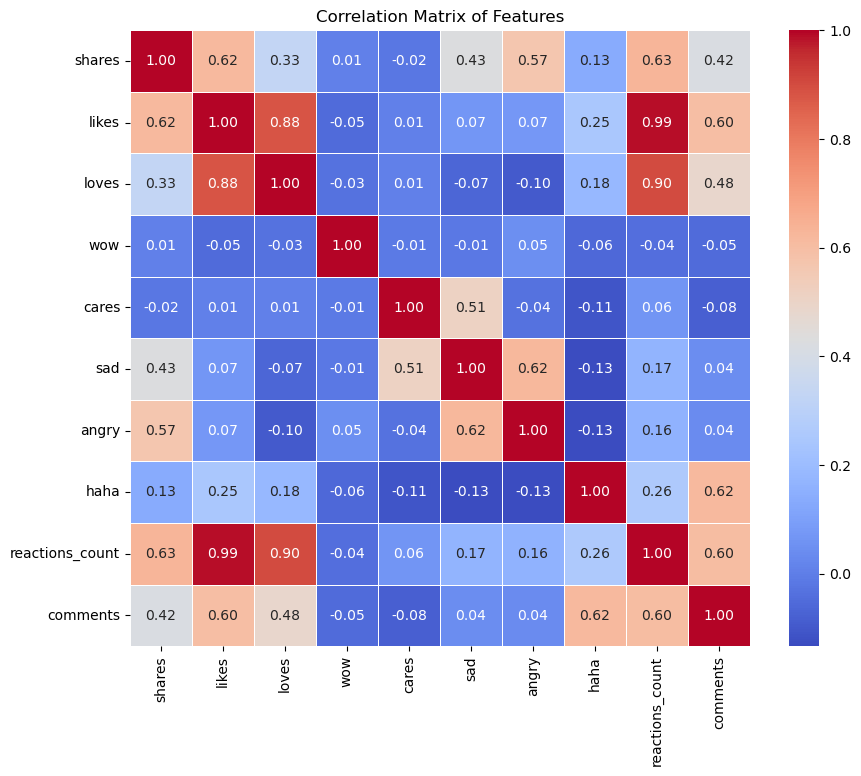

In [130]:
# Calculate correlation between negative comments and other features
correlation_matrix = female_data_orj[['shares', 'likes', 'loves', 'wow', 'cares', 'sad', 'angry', 'haha', 'reactions_count', 'comments']].corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

Correlation Matrix:
                   shares     likes     loves       wow     cares       sad  \
shares           1.000000  0.803679  0.554537  0.004533  0.005559  0.023397   
likes            0.803679  1.000000  0.766654 -0.052616 -0.001913 -0.004477   
loves            0.554537  0.766654  1.000000 -0.048926 -0.053672 -0.079953   
wow              0.004533 -0.052616 -0.048926  1.000000 -0.010926 -0.014526   
cares            0.005559 -0.001913 -0.053672 -0.010926  1.000000  0.786424   
sad              0.023397 -0.004477 -0.079953 -0.014526  0.786424  1.000000   
angry            0.131880 -0.094741 -0.156354  0.118603 -0.040029  0.128289   
haha             0.417075  0.328010  0.340172 -0.031319 -0.050748 -0.058917   
reactions_count  0.810140  0.985668  0.823990 -0.047279  0.052536  0.057871   
comments         0.590247  0.593787  0.674666 -0.052619 -0.010283 -0.020952   

                    angry      haha  reactions_count  comments  
shares           0.131880  0.417075         0

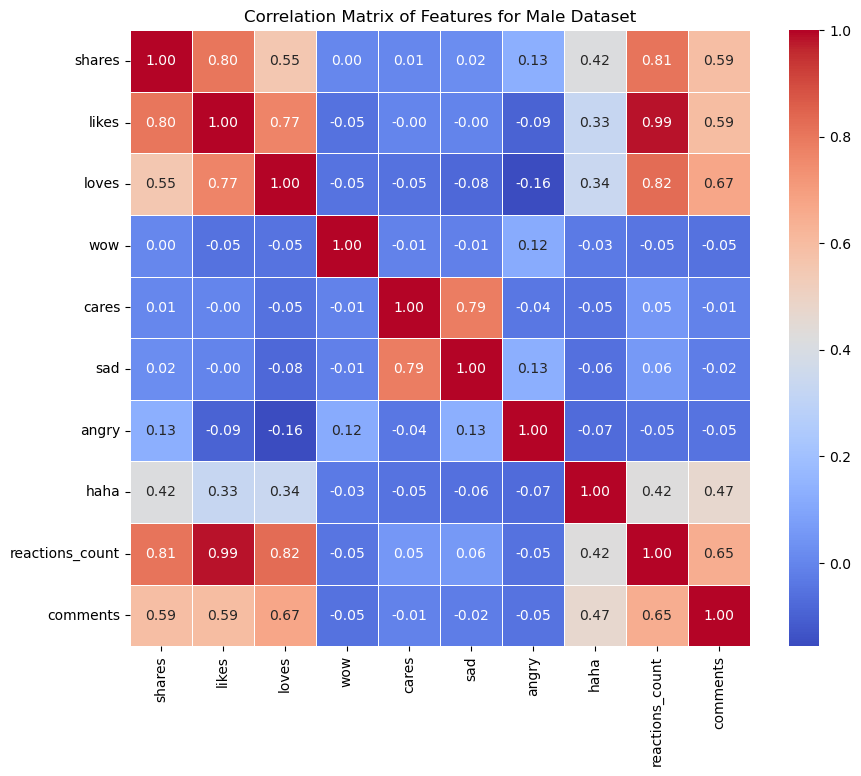

In [131]:
# Calculate correlation between negative comments and other features
correlation_matrix = male_data_orj[['shares', 'likes', 'loves', 'wow', 'cares', 'sad', 'angry', 'haha', 'reactions_count', 'comments']].corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features for Male Dataset')
plt.show()

In [108]:
male_data.columns

Index(['FileName', 'Gender', 'Responsibility', 'Content_Reactions_post_id',
       'name', 'shares', 'likes', 'loves', 'wow', 'cares', 'sad', 'angry',
       'haha', 'reactions_count', 'comments', 'content', 'posted_on',
       'Comments_post_id', 'comment_id', 'commenter_name',
       'comment_text_original', 'comment_text', 'text_column_cleaned',
       'filtered_comments', 'comment_text_lastversion_updated',
       'log_comment_length', 'comment_text_cleaned_url',
       'comment_preprocessed', 'comment_text_latest', 'sentiment',
       'comment_sentiment_nltk', 'post_sentiment_textblob',
       'post_sentiment_nltk', 'comment_sentiment_textblob', 'vader_sentiment',
       'nltk_sentiment', 'textblob_sentiment', 'vader_sentiment_category',
       'nltk_sentiment_category', 'textblob_sentiment_category'],
      dtype='object')

In [110]:
# Find the top 3 most toxic comments
top_toxic_comments = female_data.nlargest(3, 'comment_sentiment_nltk')['comment_text_cleaned_url']

# Display top toxic comments and their corresponding posts
for idx, comment in enumerate(top_toxic_comments):
    post_id = female_data.iloc[idx]['Comments_post_id']
    post_content = female_data[female_data['Comments_post_id'] == post_id]['content'].iloc[0]
    print(f"Top {idx+1} Toxic Comment:\n{comment}\nCorresponding Post:\n{post_content}\n")


Top 1 Toxic Comment:
Public InvitationWhoever received invitation informed argument God God ultimate argument lie search find God sent Awaited Imam Mahdi Gods successors earth prophet messenger supporter Messenger God calls people prophets called worship God partner resort book Quran preserved distortionThe Imams argument insight argument insight Messenger God Quran true unite Muslims judge according Book God differed return method prophecy worlds facts Quran reality invite caliphate spread knowledge God given knowledge Book Quran argued Quran Imam alMahdi overpowered knowledge proof caliphate time place Caliph God Caliph Imam Mahdi Sunni Shiite Hanif Muslim prophets God Quran clarifies Quran calls peaceful coexistence human peoples warns era great signs Hour era true statement calls return Book God Great Quran preserved distortion dominates books disbelief contradicts Torah Gospel Prophetic SunnahIt data calls Muslims stop fighting enter peace renounce sectarianism division religionAn

In [111]:
# Find the top 3 most toxic comments
top_toxic_comments = male_data.nlargest(3, 'comment_sentiment_nltk')['comment_text_cleaned_url']

# Display top toxic comments and their corresponding posts
for idx, comment in enumerate(top_toxic_comments):
    post_id = male_data.iloc[idx]['Comments_post_id']
    post_content = male_data[male_data['Comments_post_id'] == post_id]['content'].iloc[0]
    print(f"Top {idx+1} Toxic Comment:\n{comment}\nCorresponding Post:\n{post_content}\n")


Top 1 Toxic Comment:
Best Way playing guitar singing guitar guitar form form guitar certain tone want beginning song play strong rhythm voice sing nice way music guitar nice listen voice sing sing sing music play makes feel good singing nice relaxing play excited song song excited playing best music love guys fun proud fun hope hear music good friend guys excited hear dad excited mom excited mom mom talk excited family love dad love family proud family guys excited great day guys love proud mom happy dad love dad excited dad love mom mom young woman dad forever love father dad love dad proud dad love dad dad best dad mom mom forget mom mom live mom mom love dad great dad love mom mom let dad love father love dad mom forget dad mom brother dad love brother brother love dad forget mom forgive mom mom forget remember mom love dad love dad love dad love dad love dad love dad love mom dad love dad mom love brother love father mom great dad mom love brother mom
Corresponding Post:
For too lo

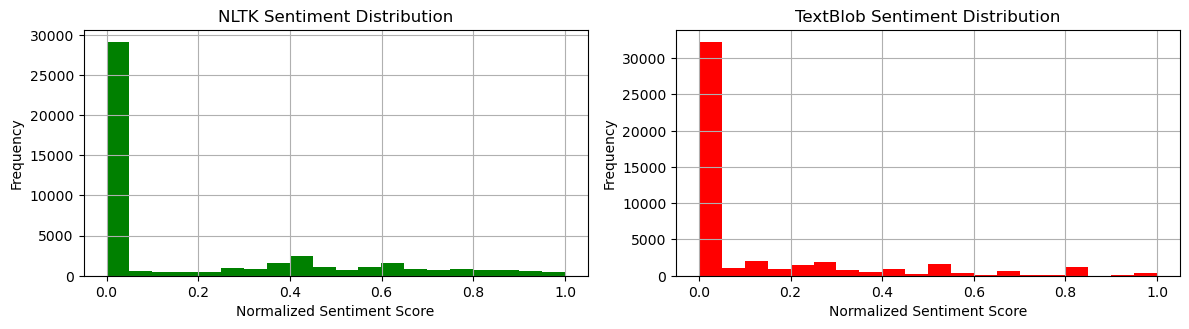

In [138]:
# Define function to normalize sentiment scores to [0, 1] range
def normalize_sentiment(score):
    return (score - min_score) / (max_score - min_score)

# Compute min and max sentiment scores for normalization
min_score = min(female_data_orj['nltk_sentiment'].min(), female_data_orj['textblob_sentiment'].min())
max_score = max(female_data_orj['nltk_sentiment'].max(), female_data_orj['textblob_sentiment'].max())

# Normalize sentiment scores
female_data_orj['nltk_sentiment_normalized'] = female_data_orj['nltk_sentiment'].apply(normalize_sentiment)
female_data_orj['textblob_sentiment_normalized'] = female_data_orj['textblob_sentiment'].apply(normalize_sentiment)

# Plot NLTK Sentiment Distribution
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
female_data_orj['nltk_sentiment_normalized'].hist(color='green', bins=20)
plt.title('NLTK Sentiment Distribution')
plt.xlabel('Normalized Sentiment Score')
plt.ylabel('Frequency')

# Plot TextBlob Sentiment Distribution
plt.subplot(2, 2, 2)
female_data_orj['textblob_sentiment_normalized'].hist(color='red', bins=20)
plt.title('TextBlob Sentiment Distribution')
plt.xlabel('Normalized Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



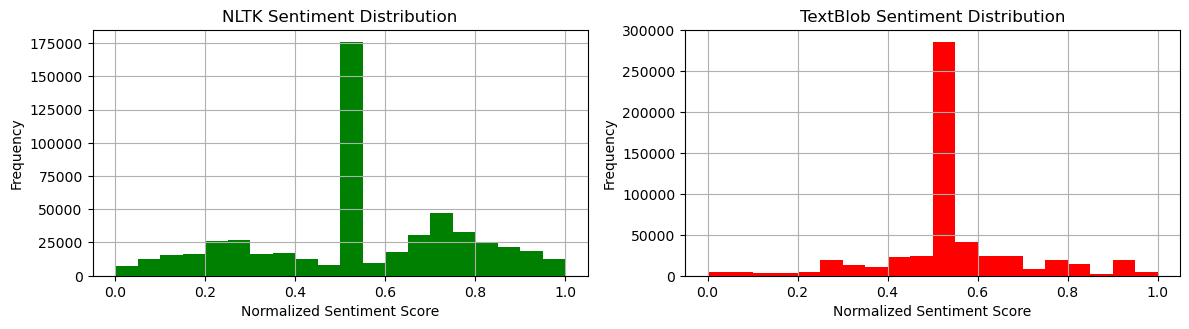

In [142]:
# Define function to normalize sentiment scores to [0, 1] range
def normalize_sentiment(score):
    return (score - min_score) / (max_score - min_score)

# Compute min and max sentiment scores for normalization
min_score = min(male_data_orj['nltk_sentiment'].min(), male_data_orj['textblob_sentiment'].min())
max_score = max(male_data_orj['nltk_sentiment'].max(), male_data_orj['textblob_sentiment'].max())

# Normalize sentiment scores
male_data_orj['nltk_sentiment_normalized'] = male_data_orj['nltk_sentiment'].apply(normalize_sentiment)
male_data_orj['textblob_sentiment_normalized'] = male_data_orj['textblob_sentiment'].apply(normalize_sentiment)

# Plot NLTK Sentiment Distribution
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
male_data_orj['nltk_sentiment_normalized'].hist(color='green', bins=20)
plt.title('NLTK Sentiment Distribution')
plt.xlabel('Normalized Sentiment Score')
plt.ylabel('Frequency')

# Plot TextBlob Sentiment Distribution
plt.subplot(2, 2, 2)
male_data_orj['textblob_sentiment_normalized'].hist(color='red', bins=20)
plt.title('TextBlob Sentiment Distribution')
plt.xlabel('Normalized Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [146]:
# Exact numbers for NLTK sentiment distribution
nltk_counts_male_politicians = male_data_orj['nltk_sentiment'].value_counts()

# Exact numbers for TextBlob sentiment distribution
textblob_counts_male_politicians = male_data_orj['textblob_sentiment'].value_counts()

print("Male Politicians NLTK Sentiment Counts:")
print(nltk_counts_male_politicians)

print("\nMale Politicians TextBlob Sentiment Counts:")
print(textblob_counts_male_politicians)

Male Politicians NLTK Sentiment Counts:
 0.0000    165129
 0.3612     17097
 0.4019     12591
 0.4404     12415
 0.5719      9996
            ...  
-0.5402         1
 0.7956         1
 0.1423         1
-0.5336         1
 0.9486         1
Name: nltk_sentiment, Length: 4497, dtype: int64

Male Politicians TextBlob Sentiment Counts:
 0.000000    266733
 0.800000     16809
 0.500000     15683
-0.500000     12229
 0.200000     10094
              ...  
 0.155357         1
 0.179270         1
 0.183730         1
-0.213542         1
 0.052083         1
Name: textblob_sentiment, Length: 13041, dtype: int64


In [148]:
# Exact numbers for NLTK sentiment distribution
nltk_counts_female_politicians = female_data_orj['nltk_sentiment'].value_counts()

# Exact numbers for TextBlob sentiment distribution
textblob_counts_female_politicians = female_data_orj['textblob_sentiment'].value_counts()

print("Female Politicians NLTK Sentiment Counts:")
print(nltk_counts_female_politicians)

print("\nFemale Politicians TextBlob Sentiment Counts:")
print(textblob_counts_female_politicians)

Male Politicians NLTK Sentiment Counts:
0.0000    28862
0.3612     1230
0.4404      918
0.4019      878
0.4215      614
          ...  
0.0857        1
0.0202        1
0.9963        1
0.9897        1
0.3669        1
Name: nltk_sentiment, Length: 723, dtype: int64

Male Politicians TextBlob Sentiment Counts:
0.000000    31291
0.500000     1404
0.800000     1151
0.200000      878
0.250000      748
            ...  
0.201010        1
0.059615        1
0.052083        1
0.273810        1
0.126071        1
Name: textblob_sentiment, Length: 1972, dtype: int64


In [151]:
# Classify NLTK sentiment scores into categories with adjusted thresholds
def classify_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Apply the classification function to NLTK sentiment scores
classified_nltk_sentiment = female_data_orj['nltk_sentiment'].apply(classify_sentiment)

# Count the occurrences of each sentiment category
nltk_sentiment_counts = classified_nltk_sentiment.value_counts()

# Print the counts for each sentiment category
print("Male Politicians NLTK Sentiment Counts:")
print(nltk_sentiment_counts)

Male Politicians NLTK Sentiment Counts:
neutral     29789
positive    16733
Name: nltk_sentiment, dtype: int64


In [ ]:
# Convert 'comment_text' to string to handle any non-string values
female_data_orj['comment_text_cleaned_url'] = female_data_orj['comment_text_cleaned_url'].astype(str)

# NLTK Vader Sentiment Analysis
def nltk_sentiment_analysis(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(text)['compound']
    return sentiment_score

# TextBlob Sentiment Analysis
def textblob_sentiment_analysis(text):
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity
    return sentiment_score

# Apply sentiment analysis to create new columns
female_data_orj['vader_sentiment'] = female_data_orj['filtered_comments'].apply(nltk_sentiment_analysis)
female_data_orj['nltk_sentiment'] = female_data_orj['filtered_comments'].apply(nltk_sentiment_analysis)
female_data_orj['textblob_sentiment'] = female_data_orj['filtered_comments'].apply(textblob_sentiment_analysis)

In [153]:
# Map sentiment scores to sentiment categories
female_data_orj['vader_sentiment_category'] = female_data_orj['vader_sentiment'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))
female_data_orj['nltk_sentiment_category'] = female_data_orj['nltk_sentiment'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))
female_data_orj['textblob_sentiment_category'] = female_data_orj['textblob_sentiment'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

# Overall sentiment for the female dataset
overall_vader_sentiment = female_data_orj['vader_sentiment_category'].value_counts()
overall_nltk_sentiment = female_data_orj['nltk_sentiment_category'].value_counts()
overall_textblob_sentiment = female_data_orj['textblob_sentiment_category'].value_counts()

# Print or visualize the overall sentiment for the female dataset
print("Overall Vader Sentiment:")
print(overall_vader_sentiment)

print("\nOverall NLTK Sentiment:")
print(overall_nltk_sentiment)

print("\nOverall TextBlob Sentiment:")
print(overall_textblob_sentiment)

Overall Vader Sentiment:
Positive    17660
Negative    16164
Neutral     12698
Name: vader_sentiment_category, dtype: int64

Overall NLTK Sentiment:
Neutral     28862
Positive    17660
Name: nltk_sentiment_category, dtype: int64

Overall TextBlob Sentiment:
Neutral     31291
Positive    15231
Name: textblob_sentiment_category, dtype: int64


In [154]:
# Map sentiment scores to sentiment categories
male_data_orj['vader_sentiment_category'] = male_data_orj['vader_sentiment'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))
male_data_orj['nltk_sentiment_category'] = male_data_orj['nltk_sentiment'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))
male_data_orj['textblob_sentiment_category'] = male_data_orj['textblob_sentiment'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

# Overall sentiment for the female dataset
overall_vader_sentiment = male_data_orj['vader_sentiment_category'].value_counts()
overall_nltk_sentiment = male_data_orj['nltk_sentiment_category'].value_counts()
overall_textblob_sentiment = male_data_orj['textblob_sentiment_category'].value_counts()

# Print or visualize the overall sentiment for the female dataset
print("Male Politicians - Overall Vader Sentiment:")
print(overall_vader_sentiment)

print("\nMale Politicians - Overall NLTK Sentiment:")
print(overall_nltk_sentiment)

print("\nMale Politicians - Overall TextBlob Sentiment:")
print(overall_textblob_sentiment)

Male Politicians - Overall Vader Sentiment:
Positive    226467
Neutral     165129
Negative    159828
Name: vader_sentiment_category, dtype: int64

Male Politicians - Overall NLTK Sentiment:
Positive    226467
Neutral     165129
Negative    159828
Name: nltk_sentiment_category, dtype: int64

Male Politicians - Overall TextBlob Sentiment:
Neutral     266733
Positive    174395
Negative    110296
Name: textblob_sentiment_category, dtype: int64


In [152]:
female_data_orj.head()

FileName  Gender Responsibility  \
0  Content_Reactions  Female     US - House   
1  Content_Reactions  Female     US - House   
2  Content_Reactions  Female     US - House   
3  Content_Reactions  Female     US - House   
4  Content_Reactions  Female     US - House   

                           Content_Reactions_post_id  \
0  pfbid0xZpMfuyep3UrmXHzmVXtyWa6Tqr3F1vydu4R7ZQ4...   
1  pfbid0xZpMfuyep3UrmXHzmVXtyWa6Tqr3F1vydu4R7ZQ4...   
2  pfbid0xZpMfuyep3UrmXHzmVXtyWa6Tqr3F1vydu4R7ZQ4...   
3  pfbid0xZpMfuyep3UrmXHzmVXtyWa6Tqr3F1vydu4R7ZQ4...   
4  pfbid0xZpMfuyep3UrmXHzmVXtyWa6Tqr3F1vydu4R7ZQ4...   

                       name  shares  likes  loves  wow  cares  ...  \
0  Alexandria Ocasio-Cortez     202   1400    384    0      0  ...   
1  Alexandria Ocasio-Cortez     202   1400    384    0      0  ...   
2  Alexandria Ocasio-Cortez     202   1400    384    0      0  ...   
3  Alexandria Ocasio-Cortez     202   1400    384    0      0  ...   
4  Alexandria Ocasio-Cortez     202   1400    384    0      0  ...   

   comment_sentiment_nltk  vader_sentiment  nltk_sentiment  \
0                 -0.4404          -0.4404          0.0000   
1                 -0.8750          -0.8750          0.0000   
2                 -0.7783          -0.7783          0.0000   
3                  0.0000           0.0000          0.0000   
4                  0.6697           0.6697          0.6697   

   textblob_sentiment  vader_sentiment_category nltk_sentiment_category  \
0                 0.0                  Negative                Negative   
1                 0.0                  Negative                Negative   
2                 0.0                  Negative                Negative   
3                 0.0                   Neutral                 Neutral   
4                 0.5                  Positive                Positive   

  textblob_sentiment_category comment_sentiment  nltk_sentiment_normalized  \
0                     Neutral              0.00                     0.0000   
1                    Negative             -0.35                     0.0000   
2                    Negative             -0.80                     0.0000   
3                     Neutral              0.00                     0.0000   
4                    Positive              0.50                     0.6697   

  textblob_sentiment_normalized  
0                           0.0  
1                           0.0  
2                           0.0  
3                           0.0  
4                           0.5  

[5 rows x 43 columns]

In [156]:
female_data_orj.columns

Index(['FileName', 'Gender', 'Responsibility', 'Content_Reactions_post_id',
       'name', 'shares', 'likes', 'loves', 'wow', 'cares', 'sad', 'angry',
       'haha', 'reactions_count', 'comments', 'content', 'posted_on',
       'Comments_post_id', 'comment_id', 'commenter_name', 'comment_text_X',
       'comment_text', 'text_column_cleaned', 'filtered_comments',
       'log_comment_length', 'comment_text_cleaned_url', 'comment_length',
       'content_length', 'sentiment', 'comment_text_latest',
       'post_sentiment_textblob', 'post_sentiment_nltk',
       'comment_sentiment_textblob', 'comment_sentiment_nltk',
       'vader_sentiment', 'nltk_sentiment', 'textblob_sentiment',
       'vader_sentiment_category', 'nltk_sentiment_category',
       'textblob_sentiment_category', 'comment_sentiment',
       'nltk_sentiment_normalized', 'textblob_sentiment_normalized'],
      dtype='object')

In [124]:
# Filter the dataset for negative sentiment comments
negative_comments_female = female_data[female_data['vader_sentiment_category'] == 'Negative']

# Sort the filtered dataset based on sentiment scores
sorted_negative_comments_female = negative_comments_female.sort_values(by='vader_sentiment', ascending=False)

# Select the top 10 negative comments
top_10_negative_comments_female = sorted_negative_comments_female.head(3)

# Set pandas display options to show full text
pd.set_option('display.max_colwidth', None)

# Print or view the top 10 negative comments with full text
print(top_10_negative_comments_female[['comment_id','comment_text', 'vader_sentiment']])

             comment_id  \
33030   588640000000000   
1455   6753819334663740   
19730   631791000000000   

                                                                                                                                                                                                                                                         comment_text  \
33030                                                                                                                   I dont believe hell be vindicated but I absolutely agree every American should have access to every minute of the trial  all of them actually   
1455   Alexandria please remember these beautiful images of Our Family and Our Children when we are confronted by opposing oppositional forces beyond our humanly control As a child I made horrible decisions especially in choosing friends in the midst of jealous   
19730                                                                                           

In [121]:
# Filter the dataset for negative sentiment comments
negative_comments_male = male_data[male_data['vader_sentiment_category'] == 'Negative']

# Sort the filtered dataset based on sentiment scores
sorted_negative_comments_male = negative_comments_male.sort_values(by='vader_sentiment', ascending=False)

# Select the top 10 negative comments
top_10_negative_comments_male = sorted_negative_comments_male.head(3)

# Print or view the top 10 negative comments
# print(top_10_negative_comments_female[['comment_text', 'vader_sentiment']])

# Set pandas display options to show full text
pd.set_option('display.max_colwidth', None)

# Print or view the top 10 negative comments with full text
print(top_10_negative_comments_male[['comment_text', 'vader_sentiment']])

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            comment_text  \
507601                                                                                      

In [118]:
# Filter the dataset for negative sentiment comments
positive_comments_female = female_data[female_data['vader_sentiment_category'] == 'Positive']

# Sort the filtered dataset based on sentiment scores
sorted_positive_comments_female = positive_comments_female.sort_values(by='vader_sentiment', ascending=False)

# Select the top 10 negative comments
top_3_positive_comments_female = sorted_positive_comments_female.head(3)
# Set pandas display options to show full text
pd.set_option('display.max_colwidth', None)
# Print or view the top 10 negative comments
print(top_3_positive_comments_female[['comment_text', 'vader_sentiment']])

In [122]:
# Filter the dataset for negative sentiment comments
positive_comments_male = male_data[male_data['vader_sentiment_category'] == 'Positive']

# Sort the filtered dataset based on sentiment scores
sorted_positive_comments_male = positive_comments_male.sort_values(by='vader_sentiment', ascending=False)

# Select the top 10 negative comments
top_3_positive_comments_male = sorted_positive_comments_male.head(3)
# Set pandas display options to show full text
pd.set_option('display.max_colwidth', None)
# Print or view the top 10 negative comments
print(top_3_positive_comments_male[['comment_text', 'vader_sentiment']])

In [120]:
# Filter the dataset for negative sentiment comments
neutral_comments_female = female_data[female_data['vader_sentiment_category'] == 'Neutral']

# Sort the filtered dataset based on sentiment scores
sorted_neutral_comments_female = neutral_comments_female.sort_values(by='vader_sentiment', ascending=False)

# Select the top 10 negative comments
top_3_neutral_comments_female = sorted_neutral_comments_female.head(3)
# Set pandas display options to show full text
pd.set_option('display.max_colwidth', None)
# Print or view the top 10 negative comments
print(top_3_neutral_comments_female[['comment_text', 'vader_sentiment']])

                                                                   comment_text  \
3      A TART meetingmakesme believe Female does indeed have different meanings   
30998                                                          NotGoingToHappen   
31001                                                And does it go anywhere No   

       vader_sentiment  
3                  0.0  
30998              0.0  
31001              0.0  


In [123]:
# Filter the dataset for negative sentiment comments
neutral_comments_male = male_data[male_data['vader_sentiment_category'] == 'Neutral']

# Sort the filtered dataset based on sentiment scores
sorted_neutral_comments_male = neutral_comments_male.sort_values(by='vader_sentiment', ascending=False)

# Select the top 10 negative comments
top_3_neutral_comments_male = sorted_neutral_comments_male.head(3)
# Set pandas display options to show full text
pd.set_option('display.max_colwidth', None)
# Print or view the top 10 negative comments
print(top_3_neutral_comments_male[['comment_text', 'vader_sentiment']])

                                                                                                                                                                                                                                                 comment_text  \
0                                                                                                                                                                                                                                                       AMEN    
357592                                                                                                                                                                                            Pedro Alejandro Alvarez Santiago Ill bet it is deep thinker   
357679  Peg Attili And you dont think a doctor has the expertise and knowledge how to remove a baby without doing an abortion on a live baby Also can you cash a check get on an airplane buy a house buy a drink or a bottle of wine

In [210]:
# Filter the dataset for negative sentiment comments
neutral_comments_female = female_data_orj[female_data_orj['vader_sentiment_category'] == 'Neutral']

# Sort the filtered dataset based on sentiment scores
sorted_neutral_comments_female = neutral_comments_female.sort_values(by='vader_sentiment', ascending=False)

# Select the top 10 negative comments
top_10_neutral_comments_female = sorted_neutral_comments_female.head(10)

# Print or view the top 10 negative comments
print(top_10_neutral_comments_female[['comment_text', 'vader_sentiment']])

                                            comment_text  vader_sentiment
3      A TART meetingmakesme believe Female does inde...              0.0
30992   you talking about hunter wray myorkas or garland              0.0
30998                                   NotGoingToHappen              0.0
30999                       Stefanik driving Cliff ahead              0.0
31001                         And does it go anywhere No              0.0
31006      Snowbirds dont stay in your state or district              0.0
31007                                      Bobby Carabis              0.0
31008                      Cant wait to see your mugshot              0.0
31009  Every step or actions are measured by the resu...              0.0
31016                                               I do              0.0


In [196]:
# Filter the dataset for negative sentiment comments
negative_comments_male = male_data_orj[male_data_orj['vader_sentiment_category'] == 'Negative']

# Sort the filtered dataset based on sentiment scores
sorted_negative_comments_male = negative_comments_male.sort_values(by='vader_sentiment', ascending=False)

# Select the top 10 negative comments
top_10_negative_comments_male = sorted_negative_comments_male.head(10)

# Print or view the top 10 negative comments
print(top_10_negative_comments_male[['comment_text', 'vader_sentiment']])

                                             comment_text  vader_sentiment
507601  Well they have obeyed their masters and are wo...          -0.0009
58295   Bob Brinkman I call BS The thing that DID almo...          -0.0015
397918  Scott Kelley I should probably not be doing th...          -0.0018
285212  Little Marco is desperate for attention and ca...          -0.0018
358450  Penny Malliet GruetzmacherSweetie  Biden is TH...          -0.0018
382333  Rita Pacchiana Big Deal Because he spends his ...          -0.0018
535553  You are a joke Look like a little prison sissy...          -0.0018
427871  Stuff it little Marco You lost any credibility...          -0.0018
235164  Jennie Pawlowsky  like many others of your min...          -0.0038
266058  Keith Baker you are a fucking moron pretty simple          -0.0038


In [ ]:
# Filter the dataset for negative sentiment comments
neutral_comments_male = male_data_orj[male_data_orj['vader_sentiment_category'] == 'Negative']

# Sort the filtered dataset based on sentiment scores
sorted_negative_comments_male = negative_comments_male.sort_values(by='vader_sentiment', ascending=False)

# Select the top 10 negative comments
top_10_negative_comments_male = sorted_negative_comments_male.head(10)

# Print or view the top 10 negative comments
print(top_10_negative_comments_male[['comment_text', 'vader_sentiment']])

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

def nltk_sentiment_analysis(comment):
    # Check if the comment is NaN (missing value)
    if pd.isna(comment):
        return 'Neutral'  # Return Neutral for missing values
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(comment)
    if sentiment_score['compound'] > 0.05:
        return 'Positive'
    elif sentiment_score['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply NLTK sentiment analysis and store the result in a new column
female_data_orj['nltk_sentiment'] = female_data['comment_text'].apply(nltk_sentiment_analysis)

In [ ]:
# Filter comments by sentiment category (e.g., negative sentiment)
negative_comments_female = female_data[female_data['vader_sentiment_category'] == 'Negative']

# Sort negative comments by sentiment score in descending order
top_negative_comments_female = negative_comments_female.sort_values(by='vader_sentiment', ascending=False).head(10)

# Similarly, repeat the above steps for positive and neutral comments


In [ ]:
# Filter comments by sentiment category (e.g., negative sentiment)
negative_comments_male = male_data[male_data['vader_sentiment_category'] == 'Negative']

# Sort negative comments by sentiment score in descending order
top_negative_comments_male = negative_comments_male.sort_values(by='vader_sentiment', ascending=False).head(10)

# Similarly, repeat the above steps for positive and neutral comments

Top 10 Positive Comments:
                                            comment_text  vader_sentiment  \
33898  Public InvitationWhoever received this invitat...           0.9990   
38457  Our Corrupt politicians DO NOT CARE ABOUT YOU ...           0.9985   
26622  Rodrguez Juritza Our Corrupt politicians DO NO...           0.9985   
12264  Our Corrupt politicians DO NOT CARE ABOUT YOU ...           0.9985   
12113  Edith M DingleWoolridge Both Democrats  Republ...           0.9985   
45741  Our Corrupt politicians DO NOT CARE ABOUT YOU ...           0.9985   
7606   NOW FOR THE TRUTH Corrupt politicians DO NOT C...           0.9985   
34444  Our Corrupt politicians DO NOT CARE ABOUT YOU ...           0.9985   
26546  Corrupt politicians DO NOT CARE ABOUT US Every...           0.9984   
7543   Bro youre still delusional Corrupt politicians...           0.9984   

      vader_sentiment_category  
33898                 Positive  
38457                 Positive  
26622                 Posit

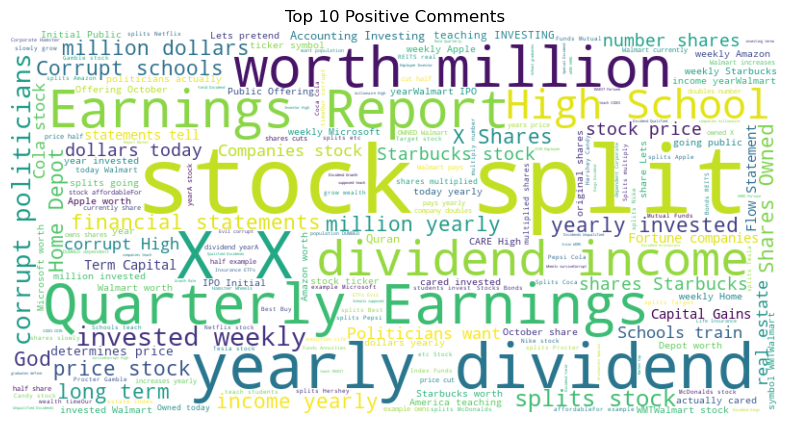

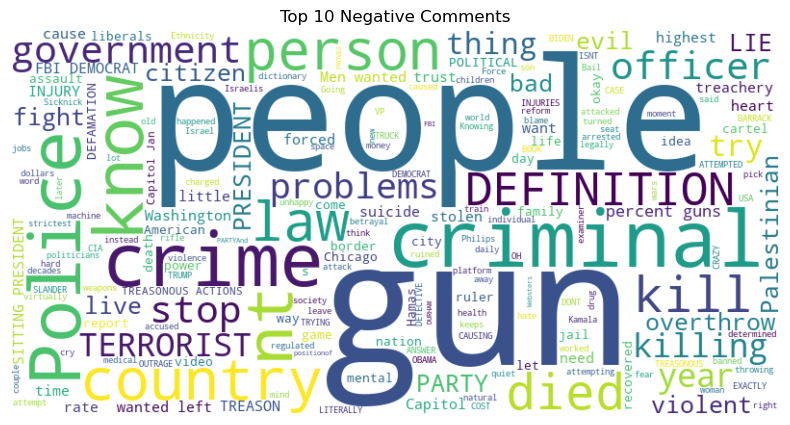

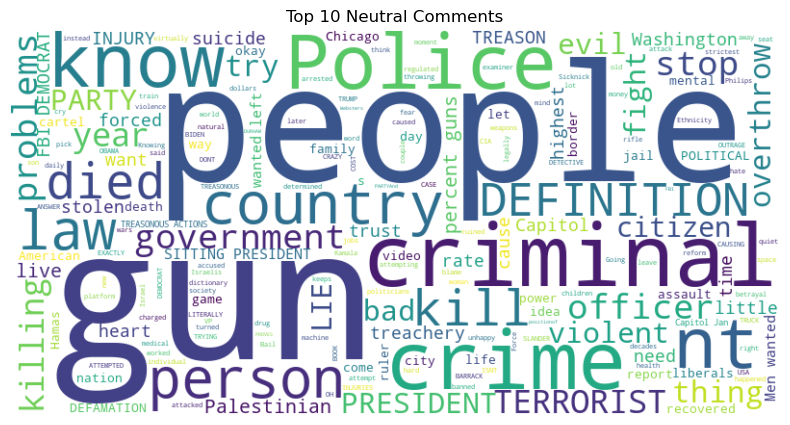

In [187]:
# Print the top 10 positive comments along with sentiment scores and categories
print("Top 10 Positive Comments:")
print(top_positive_comments[['comment_text', 'vader_sentiment', 'vader_sentiment_category']])

# Print the top 10 negative comments along with sentiment scores and categories
print("\nTop 10 Negative Comments:")
print(top_negative_comments[['comment_text', 'vader_sentiment', 'vader_sentiment_category']])

# Print the top 10 neutral comments along with sentiment scores and categories
print("\nTop 10 Neutral Comments:")
print(top_neutral_comments[['comment_text', 'vader_sentiment', 'vader_sentiment_category']])

# Generate and display word clouds for each sentiment category
generate_word_cloud(top_positive_comments['filtered_comments'], 'Top 10 Positive Comments')
generate_word_cloud(top_negative_comments['filtered_comments'], 'Top 10 Negative Comments')
generate_word_cloud(top_neutral_comments['filtered_comments'], 'Top 10 Neutral Comments')


Top 10 Positive Comments:
                                            comment_text  vader_sentiment  \
33898  Public InvitationWhoever received this invitat...           0.9990   
38457  Our Corrupt politicians DO NOT CARE ABOUT YOU ...           0.9985   
26622  Rodrguez Juritza Our Corrupt politicians DO NO...           0.9985   
12264  Our Corrupt politicians DO NOT CARE ABOUT YOU ...           0.9985   
12113  Edith M DingleWoolridge Both Democrats  Republ...           0.9985   
45741  Our Corrupt politicians DO NOT CARE ABOUT YOU ...           0.9985   
7606   NOW FOR THE TRUTH Corrupt politicians DO NOT C...           0.9985   
34444  Our Corrupt politicians DO NOT CARE ABOUT YOU ...           0.9985   
26546  Corrupt politicians DO NOT CARE ABOUT US Every...           0.9984   
7543   Bro youre still delusional Corrupt politicians...           0.9984   

      vader_sentiment_category  textblob_sentiment  \
33898                 Positive            0.308788   
38457             

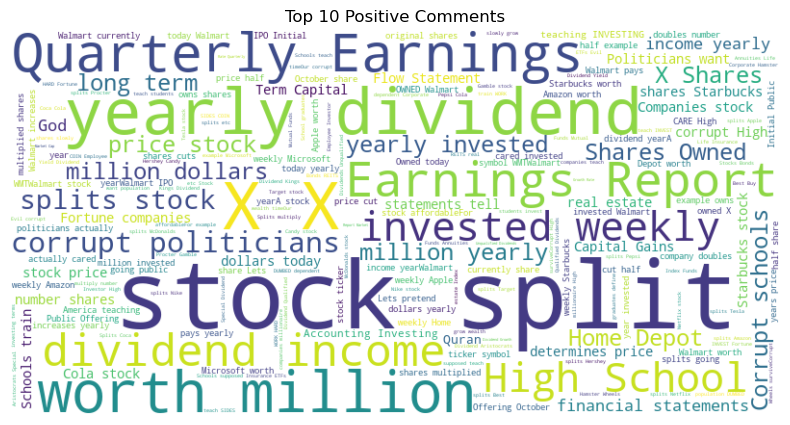

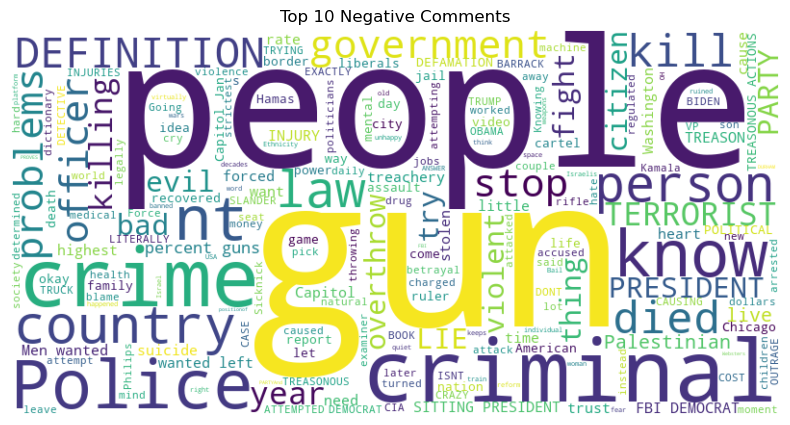

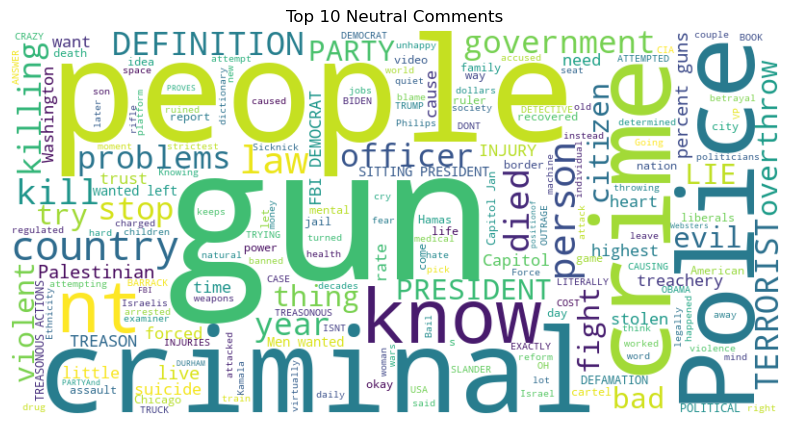

In [188]:
# Print the top 10 positive comments along with sentiment scores and categories
print("Top 10 Positive Comments:")
print(top_positive_comments[['comment_text', 'vader_sentiment', 'vader_sentiment_category', 'textblob_sentiment', 'textblob_sentiment_category', 'nltk_sentiment', 'nltk_sentiment_category']])

# Print the top 10 negative comments along with sentiment scores and categories
print("\nTop 10 Negative Comments:")
print(top_negative_comments[['comment_text', 'vader_sentiment', 'vader_sentiment_category', 'textblob_sentiment', 'textblob_sentiment_category', 'nltk_sentiment', 'nltk_sentiment_category']])

# Print the top 10 neutral comments along with sentiment scores and categories
print("\nTop 10 Neutral Comments:")
print(top_neutral_comments[['comment_text', 'vader_sentiment', 'vader_sentiment_category', 'textblob_sentiment', 'textblob_sentiment_category', 'nltk_sentiment', 'nltk_sentiment_category']])

# Generate and display word clouds for each sentiment category
generate_word_cloud(top_positive_comments['filtered_comments'], 'Top 10 Positive Comments')
generate_word_cloud(top_negative_comments['filtered_comments'], 'Top 10 Negative Comments')
generate_word_cloud(top_neutral_comments['filtered_comments'], 'Top 10 Neutral Comments')


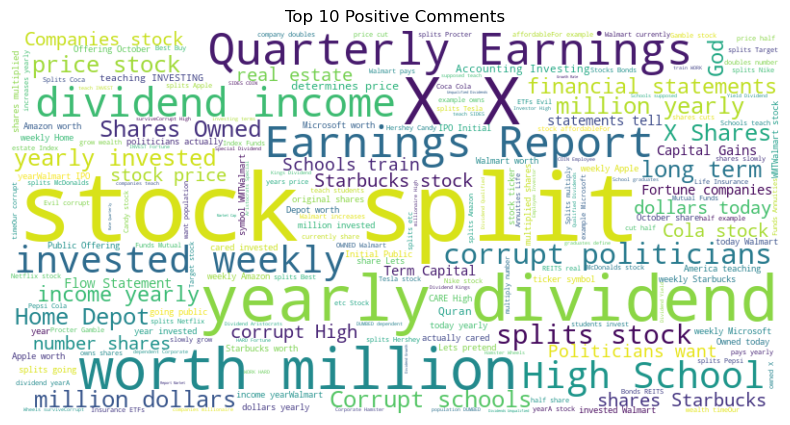

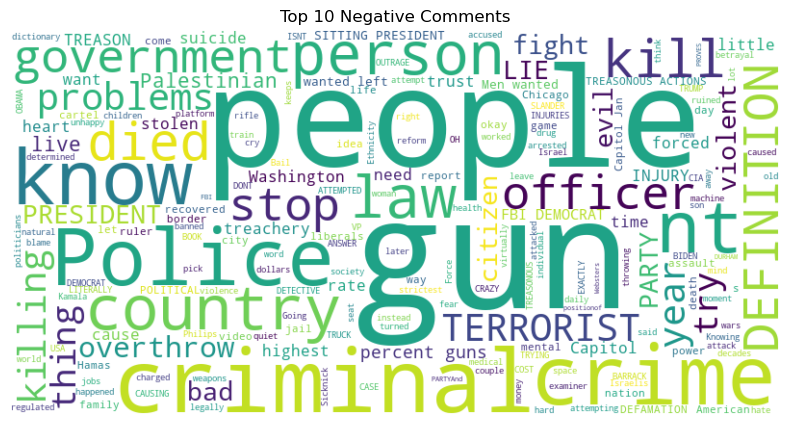

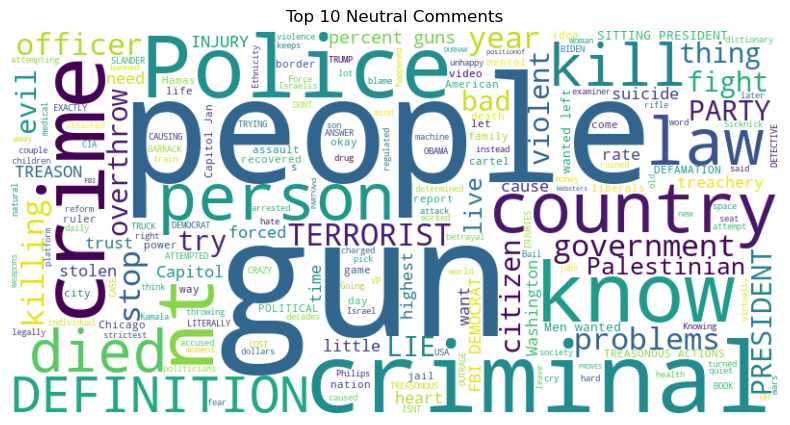

In [185]:
# Assuming you have a DataFrame named 'female_data_orj' containing sentiment scores and comments
# Sort the DataFrame based on sentiment scores to get the top positive, negative, and neutral comments
top_positive_comments = female_data_orj.sort_values(by='vader_sentiment', ascending=False).head(10)
top_negative_comments = female_data_orj.sort_values(by='vader_sentiment', ascending=True).head(10)
top_neutral_comments = female_data_orj.sort_values(by='vader_sentiment').head(10)

# Generate and display word clouds for each sentiment category
generate_word_cloud(top_positive_comments['filtered_comments'], 'Top 10 Positive Comments')
generate_word_cloud(top_negative_comments['filtered_comments'], 'Top 10 Negative Comments')
generate_word_cloud(top_neutral_comments['filtered_comments'], 'Top 10 Neutral Comments')


In [216]:
# Assuming you have separate DataFrames for male and female datasets named male_data and female_data

# Sort male dataset based on toxicity score in descending order
top_toxic_male = male_data_orj.sort_values(by='comment_sentiment_nltk', ascending=False).head(10)

# Sort female dataset based on toxicity score in descending order
top_toxic_female = female_data_orj.sort_values(by='comment_sentiment_nltk', ascending=False).head(10)

# Print top 10 toxic comments for male dataset
print("Top 10 toxic comments in the male dataset:")
print(top_toxic_male[['comment_text', 'comment_sentiment_nltk']])

# Print top 10 toxic comments for female dataset
print("\nTop 10 toxic comments in the female dataset:")
print(top_toxic_female[['comment_text', 'comment_sentiment_nltk']])

# Compare the content of the comments between the male and female datasets
# You can manually analyze the comments to identify any differences


Top 10 toxic comments in the male dataset:
                                            comment_text  \
33898  Angela Greathouse I used to think that too but...   
30141  And our Congress has no counselors that are wo...   
41009                                      ArtsakhStrong   
9879                                               Agree   
9878                                               Agree   
7606                            Absolutely right Senator   
8004   Ack Heres our answer to good Uncle Cola in Rus...   
7543   ABSOLUTELY Now lets elect people who will DO THIS   
26546                                   America Carbajal   
12111  Albert Gonzalez how about Bidenis he going to ...   

       comment_sentiment_nltk  
33898                  0.9995  
30141                  0.9988  
41009                  0.9983  
9879                   0.9977  
9878                   0.9977  
7606                   0.9976  
8004                   0.9975  
7543                   0.9975  
26546   

In [ ]:
# Train LDA model on male corpus
lda_model_male = gensim.models.LdaMulticore(corpus=corpus_male, id2word=id2word_male, num_topics=10)

# Print the topics and their terms for male dataset
pp.pprint(lda_model_male.print_topics())

In [ ]:
# Apply preprocessing to the 'comment_text' column in male_data
male_data_orj['processed_text'] = male_data_orj['comment_text'].apply(preprocess_text)

# Create Dictionary for male_data
id2word_male = corpora.Dictionary(male_data_orj['processed_text'])

# Create Corpus
corpus_male = [id2word_male.doc2bow(text) for text in male_data_orj['processed_text']]

# Display the first few rows of the male dataset
print("First few rows of male dataset:")
print(male_data_orj.head())

# Display basic information about the male dataset
print("\nMale Dataset Information:")
print("Number of Documents in Male Dataset:", len(male_data_orj))
print("Number of Terms (Words) in Male Dataset:", len(id2word_male))

# Display basic information about the male corpus
print("\nMale Corpus Information:")
print("Number of Documents in Male Corpus:", len(corpus_male))
print("Number of Terms (Words) in Male Corpus:", len(id2word_male))
print("First 10 words in male dataset:", male_data_orj['processed_text'].head(10).tolist())
print("First 10 documents in male corpus:", corpus_male[:10])


In [ ]:
# Apply preprocessing to the 'comment_text' column in male_data
female_data_orj['processed_text'] = female_data_orj['comment_text'].apply(preprocess_text)

# Create Dictionary for male_data
id2word_male = corpora.Dictionary(female_data_orj['processed_text'])

# Create Corpus
corpus_male = [id2word_male.doc2bow(text) for text in male_data_orj['processed_text']]

# Display the first few rows of the male dataset
print("First few rows of male dataset:")
print(male_data_orj.head())

# Display basic information about the male dataset
print("\nMale Dataset Information:")
print("Number of Documents in Male Dataset:", len(male_data_orj))
print("Number of Terms (Words) in Male Dataset:", len(id2word_male))

# Display basic information about the male corpus
print("\nMale Corpus Information:")
print("Number of Documents in Male Corpus:", len(corpus_male))
print("Number of Terms (Words) in Male Corpus:", len(id2word_male))
print("First 10 words in male dataset:", male_data_orj['processed_text'].head(10).tolist())
print("First 10 documents in male corpus:", corpus_male[:10])


In [ ]:
from gensim import corpora

# Create Dictionary for female dataset
id2word_female = corpora.Dictionary(female_data_orj['fd_tokenized'])

# Create Corpus for female dataset
corpus_female = [id2word_female.doc2bow(text) for text in female_data_orj['fd_tokenized']]
